In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2


df = pd.read_csv('../input/facial-expression/fer2013.csv')

df.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [2]:
len(df.iloc[0]['pixels'].split())
#48*48

2304

In [3]:
label_map = ['Anger','Disgust','Fear','Sad','Happy','Surprise','Neutral']

In [4]:
import matplotlib.pyplot as plt

In [5]:
img = df.iloc[0]['pixels'].split()

In [6]:
img = [int(i) for i in img]

In [7]:
type (img[0])

int

In [8]:
len(img)

2304

In [9]:
img = np.array(img)

In [10]:
img = img.reshape(48,48)

In [11]:
img.shape

(48, 48)

Text(0.5, 0, '0')

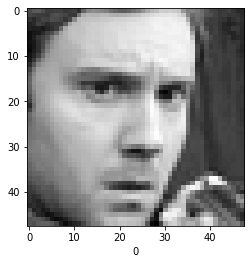

In [12]:
plt.imshow(img, cmap = 'gray')
plt.xlabel(df.iloc[0]['emotion'])

In [13]:
X=[]
y=[]

In [14]:
def getData(path):
    anger = 0
    disgust = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []
    
    for i in range(len(df)):
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 1:
                if disgust <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    disgust += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass
                
                
    return X, y

In [15]:
X, y = getData('../input/facial-expression/fer2013.csv')

In [16]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([4001,  547, 4001, 4001, 4001, 4001, 4001]))

In [17]:
X = np.array(X)/255.0
y = np.array(y)

In [18]:
X.shape, y.shape

((24553, 2304), (24553,))

In [19]:
y_o = []
for i in y:
    if i != 7:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [20]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([4001,  547, 4001, 4001, 4001, 4001, 4001]))

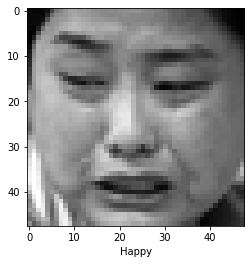

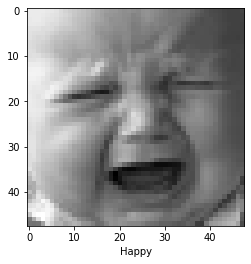

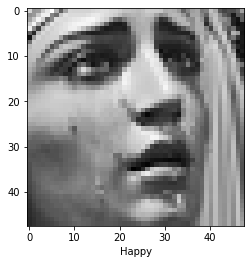

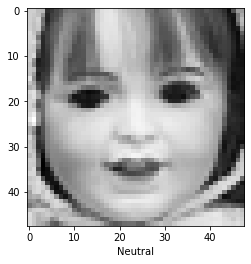

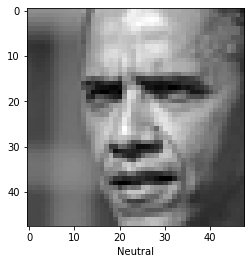

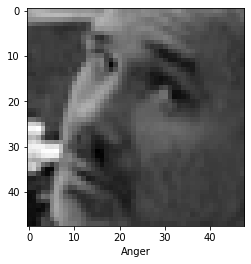

In [21]:
for i in range(6):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [22]:
X = X.reshape(len(X), 48, 48, 1)

In [23]:
# no_of_images, height, width, coloar_map

In [24]:
X.shape

(24553, 48, 48, 1)

In [25]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=7)

In [26]:
len(y_o), y_new.shape

(24553, (24553, 7))

In [27]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [29]:
model = Sequential()

input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

2022-02-18 05:50:13.909329: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
#model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       4

In [32]:
model.save('model.h5')

In [33]:
import cv2

In [34]:
test_img = cv2.imread('../input/happy-img-test/pexels-andrea-piacquadio-941693.jpg', 0)

In [35]:
test_img = img.shape

In [36]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [37]:
test_img = test_img.reshape(1,48,48,1)

In [38]:
model.predict(test_img)

2022-02-18 05:50:15.442132: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


array([[0.13269334, 0.15200348, 0.20803845, 0.12089442, 0.24912848,
        0.13724193]], dtype=float32)

In [39]:
# label_map = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']